In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'1.3.4'

In [12]:
dataset = pd.read_csv('cleandata/median_norma.csv')

In [13]:
dataset.head()

,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,1,0,0,52,18,8,2,3.0,3.8,0.16
1,0,0,1,26,12,4,1,2.0,5.0,0.36
2,1,1,1,63,20,4,2,4.0,5.8,0.49
3,0,0,1,59,20,12,1,1.0,2.6,0.20
4,1,0,0,63,10,9,3,7.0,6.9,0.52


In [14]:
y = dataset['Mental Fatigue Score']
X = dataset.drop('Mental Fatigue Score',axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Text(0.5, 1.0, 'True Degree: 8  Estimated Degree:4')

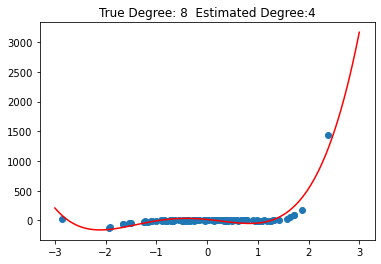

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def make_poly_features(x,degree):

    X = np.zeros(shape = (x.size, degree+1))
    X[:,0] = 1
    for i in range(degree):
        X[:,i+1] = np.power(x,i+1)

    betas = np.random.normal(0, 2, size = X.shape[1])

    y = X@betas + np.random.normal(0, 4, size = x.size)

    return y, betas


degree = np.random.randint(low = 2, high = 20)
x = np.random.normal(size = 100)
y, coef = make_poly_features(x,degree)

plt.scatter(x,y)

model = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())

parms = {'polynomialfeatures__degree': np.arange(2, 6)}

gscv = GridSearchCV(model, parms, cv = 10, scoring='neg_mean_squared_error')
gscv.fit(x.reshape(-1,1),y)

space = np.linspace(-3,3,101).reshape(-1,1)

est_deg= gscv.best_params_['polynomialfeatures__degree']

plt.plot(space, gscv.predict(space), color = 'red')
plt.title(f'True Degree: {degree}  Estimated Degree:{est_deg}')


In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg_model = LinearRegression().fit(X_poly, y_train)

In [18]:
y_pred = poly_reg_model.predict(poly_reg.fit_transform(X_test))

In [19]:
poly_reg.fit_transform(X_test).shape

(4550, 715)

In [20]:
X_test.shape

(4550, 9)

In [21]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df[2000:2010]

,Actual,Predicted
21022,0.02,0.265781
4057,1.00,0.922609
13452,0.27,0.376016
477,0.50,0.489065
3515,0.74,0.692299
9660,0.36,0.391955
19120,0.40,0.439305
8424,0.62,0.624148
7174,0.23,0.208328
20902,0.53,0.473907


In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05896031924812476
Mean Squared Error: 0.006491714969181441
Root Mean Squared Error: 0.08057117951961136


In [26]:
import joblib
joblib.dump(poly_reg_model, 'models/themodel')
joblib.dump(poly_reg, 'models/features_model')


['models/features_model']